In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
Boston_Listings_Reviews=pd.read_csv("Output/Boston_Listings_Reviews_df.csv")

In [61]:
Seattle_Listings_Reviews=pd.read_csv("Output/Seattle_Listings_Reviews_df.csv")
Boston_Listings_Reviews.head()

,Unnamed: 0,listing_id,name,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,City
0,1,3075044,Charming room in pet friendly apt,42.286241,-71.134374,Apartment,2,1.0,1.0,1.0,94.0,Boston
1,2,6976,Mexican Folk Art Haven in Boston,42.292438,-71.135765,Apartment,2,1.0,1.0,1.0,98.0,Boston
2,3,1436513,Spacious Sunny Bedroom Suite in Historic Home,42.281106,-71.121021,House,4,1.0,1.0,2.0,100.0,Boston
3,4,7651065,Come Home to Boston,42.284512,-71.136258,House,2,1.5,1.0,2.0,99.0,Boston
4,5,12386020,Private Bedroom + Great Coffee,42.291690,-71.131893,Condominium,2,1.0,1.0,1.0,100.0,Boston


In [62]:
bins=np.arange(0,101,5)
Boston_Listings_Reviews['Rating_Range']=pd.cut(Boston_Listings_Reviews.review_scores_rating,bins)
Seattle_Listings_Reviews['Rating_Range']=pd.cut(Seattle_Listings_Reviews.review_scores_rating,bins)

In [67]:
Boston_groupby_property_type=Boston_Listings_Reviews.groupby('Rating_Range')
df1=Boston_groupby_property_type["listing_id"].count()

Seattle_groupby_property_type=Seattle_Listings_Reviews.groupby('Rating_Range')
df2=Seattle_groupby_property_type["listing_id"].count()

df1=df1.reset_index()
df1.columns=['Rating_Range','Boston_Rating_Count']

df2=df2.reset_index()
df2.columns=['Rating_Range','Seattle_Rating_Count']

Rating_count=df1.merge(df2, on ='Rating_Range', how='inner')[10:20]
Rating_count

,Rating_Range,Boston_Rating_Count,Seattle_Rating_Count
10,"(50, 55]",2,2
11,"(55, 60]",32,13
12,"(60, 65]",8,2
13,"(65, 70]",28,14
14,"(70, 75]",40,18
15,"(75, 80]",197,126
16,"(80, 85]",124,73
17,"(85, 90]",414,306
18,"(90, 95]",671,836
19,"(95, 100]",1209,1758


Text(0, 0.5, 'Count')

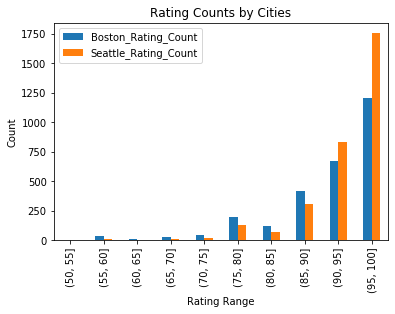

In [68]:
x_label=Rating_count['Rating_Range']
x_axis = np.arange(len(Rating_count['Boston_Rating_Count']))
tick_locations = [value for value in x_axis]
ax = Rating_count.plot.bar(rot=0)
plt.xticks(tick_locations,x_label, rotation='vertical')
plt.title('Rating Counts by Cities')
plt.xlabel('Rating Range')
plt.ylabel('Count')

In [69]:
ax.figure.savefig("Output/Boston_Seattle_by_Rating_Bar.png")